In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.0.0-alpha0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(train_image, train_lable), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
train_image.shape

(60000, 28, 28)

In [6]:
train_lable.shape

(60000,)

In [7]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

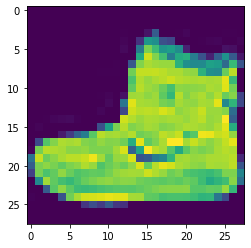

In [8]:
plt.imshow(train_image[0])

In [9]:
np.max(train_image[0])

255

In [10]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_image = train_image/255
test_image = test_image/255

In [12]:
train_image.shape

(60000, 28, 28)

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [21]:
model.fit(train_image, train_lable, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5014 - acc: 0.8231
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3730 - acc: 0.8665
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3371 - acc: 0.87580s - loss: 0.3421 - a
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3121 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2952 - acc: 0.8918


In [23]:
model.evaluate(test_image, test_label)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3422 - acc: 0.8763


[0.34224417579174043, 0.8763]

In [29]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

beijing [1, 0, 0]
shanghai [0, 1, 0]
shenzhen  [0, 0, 1]

In [21]:
train_label_onehot = tf.keras.utils.to_categorical(train_lable)

In [22]:
train_label_onehot[-1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [35]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [50]:
model.fit(train_image, train_label_onehot, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4860 - acc: 0.82650s - loss: 0.4868 - acc: 0.826
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4251 - acc: 0.8463
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4116 - acc: 0.8524
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3998 - acc: 0.8582
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3917 - acc: 0.8597


In [43]:
predict = model.predict(test_image)

In [45]:
test_image.shape

(10000, 28, 28)

In [44]:
predict.shape

(10000, 10)

In [46]:
predict[0]

array([7.7417062e-05, 1.2555851e-07, 5.2015298e-06, 3.9063170e-06,
       6.1778355e-06, 1.3308496e-02, 5.2028918e-05, 1.2039219e-02,
       6.5957895e-05, 9.7444147e-01], dtype=float32)

In [47]:
np.argmax(predict[0])

9

In [48]:
test_label[0]

9

In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [48]:
history = model.fit(train_image, train_label_onehot, 
                    epochs=10, 
                    validation_data=(test_image, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.8755 - acc: 0.6750 - val_loss: 0.5191 - val_acc: 0.8119
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6234 - acc: 0.7782 - val_loss: 0.4792 - val_acc: 0.8280
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5679 - acc: 0.7974 - val_loss: 0.4564 - val_acc: 0.8369
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5454 - acc: 0.8048 - val_loss: 0.4445 - val_acc: 0.8386
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5262 - acc: 0.8145 - val_loss: 0.4337 - val_acc: 0.8456
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5139 - acc: 0.8161 - val_loss: 0.4337 - val_acc: 0.8415
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5052 - acc: 0.8214 - val_loss: 0.

In [41]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

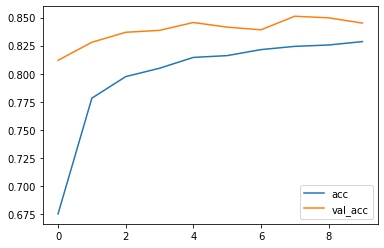

In [49]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

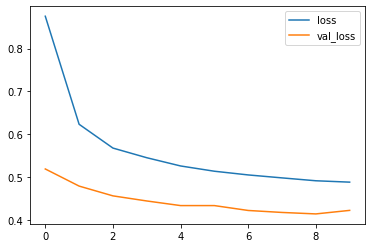

In [50]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

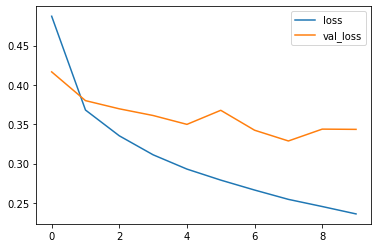

In [43]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

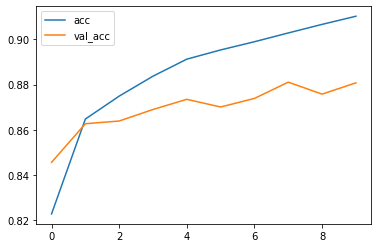

In [44]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

过拟合： 在训练数据上得分很高， 在测试数据上得分相对比较低

欠拟合：  在训练数据上得分比较低， 在测试数据上得分相对比较低

In [51]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [53]:
history = model.fit(train_image, train_label_onehot, 
                    epochs=10, 
                    validation_data=(test_image, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5556 - acc: 0.8100 - val_loss: 0.4772 - val_acc: 0.8343
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4241 - acc: 0.8527 - val_loss: 0.4320 - val_acc: 0.8490
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3888 - acc: 0.8629 - val_loss: 0.4104 - val_acc: 0.8556
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3657 - acc: 0.8704 - val_loss: 0.4739 - val_acc: 0.8276
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3501 - acc: 0.8754 - val_loss: 0.3900 - val_acc: 0.8595
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3370 - acc: 0.8793 - val_loss: 0.3835 - val_acc: 0.8643
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3243 - acc: 0.8830 - val_loss: 0.

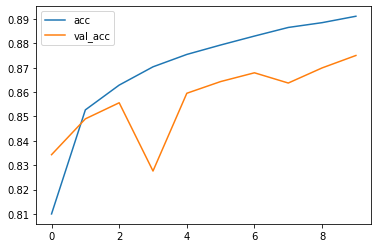

In [54]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()